In [1]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/HR_nona.csv

--2025-06-27 12:52:50--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/HR_nona.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566007 (553K) [text/plain]
Saving to: ‘HR_nona.csv’

HR_nona.csv         100%[===================>] 552.74K  --.-KB/s    in 0.007s  

2025-06-27 12:52:50 (73.2 MB/s) - ‘HR_nona.csv’ saved [566007/566007]



# Machine Learning3_cross validation

In [3]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
# install_and_import(['KneeLocator', 'clusteval'])


In [4]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

from collections import Counter

# 교차검증 (Cross Validation, CV)

## 데이터 읽기

In [6]:
rd = pd.read_csv('HR_nona.csv')
rd.head(2)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1


In [7]:
rd.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'sales', 'salary', 'left'],
      dtype='object')

## 데이터 전처리

In [8]:
## 데이터셋 로드 (HR 데이터셋 사용)
X =  rd.drop('left', axis=1)
y = rd['left']

In [9]:
## 종속변수 'left'를 Y로 설정하고 나머지를 X로 설정
# y = rd['left']
# X = rd.drop('left', axis=1)

##  의사결정나무는 범주형변수 인코딩이 필요 없지만, scikit-learn의 구현에서는 인코딩을 해줘야 함....
# 원-핫 인코딩 (범주형 변수만)
X = pd.get_dummies(X)
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14974,0.76,0.83,6,293,6,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14975,0.40,0.57,2,151,3,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14976,0.37,0.48,2,160,3,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False
14977,0.11,0.96,6,280,4,0,0,False,False,False,False,False,False,False,False,True,False,False,True,False


In [10]:
## 데이터셋을 train, test로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                                                  test_size = 0.2,
                                                                                                  random_state = 12345)

## K-fold CV
- K-fold CV
  - 머신러닝 **모델의 성능을 평가**하고 과적합을 방지하는 데 사용되는 통계적 방법 (원래 의미),
  - **하이퍼파라미터는 보통 고정**되어 있음
  
- **Nested k-fold CV**
   -  머신러닝 **모델의 하이퍼파라미터 튜닝**과 **모델 평가**를 동시에 수행
   - **하이퍼파라미터를 찾아야 함**
  
- 두 방법 모두 보통은 N 번 iteration을  적용해서 평가
- 보통 데이터셋 크기가 작을때 유용

### Nested k-fold CV
- 하이퍼파라미터 튜닝(최적화)과 모델 평가를 동시에 수행


- ex) 5 fold일때,
  - train:val:test = 16:4:5  
    - 좀 더 복잡하나 좀더 정확하고 강건한 결과 제공
  - train:val:test = 3:1:1
    - 구현이 간단해서 실무적인 경우에 주로 사용


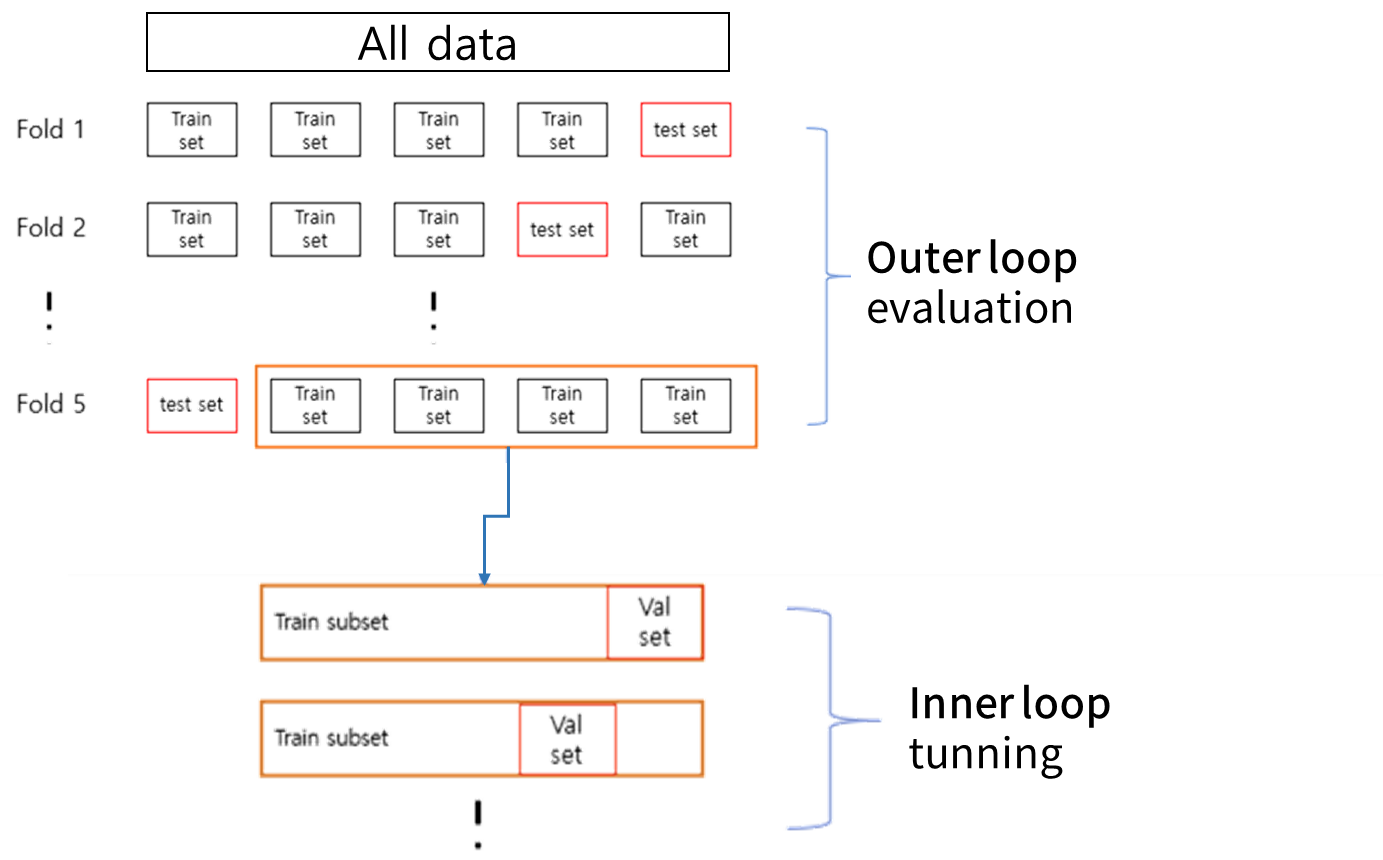

참고)
- GridSearchCV

   - **다양한 하이퍼파라미터 조합을 시도**하고, 각 조합에 대해 교차 검증을 수행해서 최적의 하이퍼파라미터를 찾음
   - 모델의 하이퍼파라미터를 튜닝하고, 최적의 조합을 찾아 모델 성능을 최대화하고 싶을때 사용
  - 최적의 하이퍼파라미터와 해당 하이퍼파라미터 조합에서의 교차 검증 점수를 출력함

- cross_val_score
  - 주어진 하이퍼파라미터 조합(특정 모델)에 대해 교차 검증을 수행하여 모델의 일반화 성능을 평가함
  - **특정 하이퍼파라미터 조합**에서 현재 모델의 성능을 평가하고자 할 때 사용
  - 각 폴드에서의 점수, 평균 점수, 표준 편차 등을 출력함..

Nested K-fold CV 안에서
- 학습 방법에 따른 CV 결과의 차이!
  - 학습시 Train data만 사용:  주어진 데이터에 대한 최적화(최적하이퍼파라 찾기) 수행, 평가는 나중에
    - 모델을 최적화하는 데 집중, 실제 성능은 나중에 확인!!
    - 보통 Test data가 외부에 있는 경우 이방법을 사용함
    - kaggle, competition 등
  - 전체 데이터 Data(X) 를 다 사용:  주어진 데이터에 대한 최적화와 성능평가 모두 수행
    - 보통 논문에서 다른 모델과 비교할 때 활용
    - 동일한 데이터로 성능 비교시 사용
    - 현재 가진 데이터로 모델의 전반적인 성능을 평가하는 데 초점
  

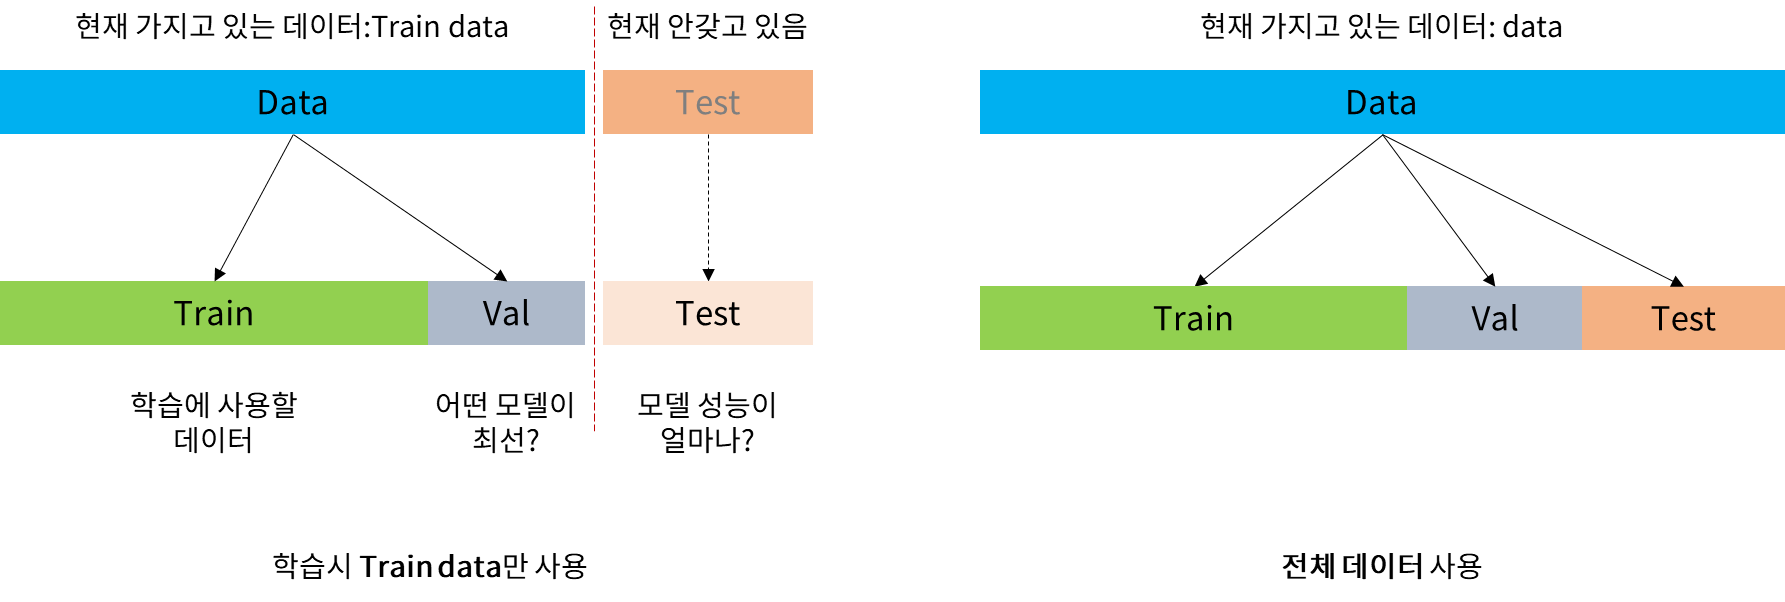

### 학습시 Train data만 사용
- 학습시 Train data만 사용:  주어진 데이터에 대한 최적화(최적하이퍼파라 찾기) 수행




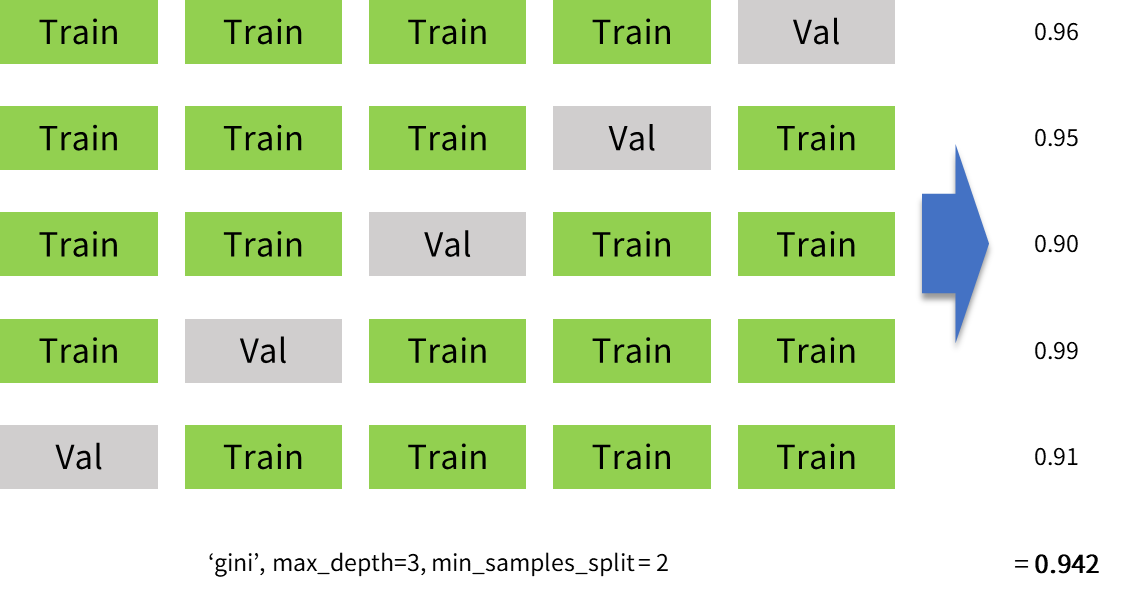

- 최적화 방법
  - Train data 안에서 train/val로 구분 후 하이퍼파라미터 튜닝 수행
  - fold 별, 최적조합별 결과를 저장
  - 추후 조합별 평가
  
- ex) k = 5인 경우,
  1. 4개의 folds는 train, 1개 fold는 validation
  2. 각 파라미터 조합별로 계산됨
    - 즉, 각 하이퍼파라조합별로 5개의 결과가 있음
    - 각 조합에 대하여 5번의 validation 결과의 평균 계산(각 조합별 성능)
  3. 평균 점수가 가장 높은 파라미터 조합을 선택함

In [11]:
## 반복 횟수
n_iterations = 10

## 최적의 하이퍼파라미터와 성능을 저장할 리스트
best_hyperparams_per_iteration = []
inner_cv_accuracies = []

In [12]:
## N번 반복
for iteration in range(n_iterations):
    print(f"\n=== Iteration {iteration + 1} ===")

    ## K-Fold 설정 (k-fold)
    inner_k = KFold(n_splits = 5, # k inner loop
                                      shuffle = True,  # fold 내부 데이터 섞을지 여부
                                      random_state = iteration*12 # 랜덤 시드
                                       )

    ## 하이퍼파라미터 그리드 정의
    param_grid  =  {
                        'criterion': ['gini', 'entropy'],
                        'max_depth': [3, 5,7, 10 ],
                        'min_samples_split': [2, 5, 10]
    }
    # (2*4*3) * 5= 120

    ## 그리드 검색 설정 (Inner-loop, 내부 교차 검증 사용)
    grid_search  =  GridSearchCV(DecisionTreeClassifier(),
                                                                param_grid, # 파라미터 그리드
                                                                cv = inner_k, # number of cv folds
                                                                scoring = 'accuracy', # scoring criteria, 'roc_auc', 'f1' 등등
                                                                refit = True, # 교차 검증 후, 최적 값을 저장
                                                                error_score = 'raise', # 애러 발생시 예외처리
                                                                verbose = True, # 내부 과정 프린트
                                                                n_jobs = -1 # 병렬 처리,
                                                   )

    ## 최적의 하이퍼파라미터 찾기
    grid_search.fit(X_train, y_train) # Train data 사용

    ## 최적의 하이퍼파라미터와 검증 정확도 저장
    best_hyperparams_per_iteration.append(grid_search.best_params_)
    inner_cv_accuracies.append(grid_search.best_score_)

    print(f"Iteration {iteration + 1}: Inner CV Accuracy: {grid_search.best_score_:.4f}")
    print(f"Best Hyperparameters from Inner CV: {grid_search.best_params_}")


=== Iteration 1 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 1: Inner CV Accuracy: 0.9789
Best Hyperparameters from Inner CV: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

=== Iteration 2 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 2: Inner CV Accuracy: 0.9790
Best Hyperparameters from Inner CV: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

=== Iteration 3 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 3: Inner CV Accuracy: 0.9785
Best Hyperparameters from Inner CV: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

=== Iteration 4 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 4: Inner CV Accuracy: 0.9781
Best Hyperparameters from Inner CV: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}

=== Iteration 5 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 5: Inner CV Accuracy:

In [13]:
best_hyperparams_per_iteration # iteration 별 최적 결과만 존재..

[{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2},
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2},
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2},
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2},
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 5},
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2},
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2},
 {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}]

In [14]:
## 가장 많이 선택된 최적의 하이퍼파라미터 조합 찾기
## 여러방식 존재
# 1. 10 iter * 5 folds = 50개 folds에서 가장 좋은 것 찾기 (과적합 가능성)
# 2. 10 iter에서 가장 좋은 것 찾기 (1번보다는 일반적)
# 3. 10 iteration의 최적 조합 중 가장 빈번한 것 선택 <- 조금 더 일반적인 방식!
# - 안정성과 성능 사이 선택
# - 가장 일반적인 방법!!


best_hyperparams_tuple = [tuple(sorted(params.items())) for params in best_hyperparams_per_iteration]
print("파라미터 조합별 빈도 계산:")
Counter(best_hyperparams_tuple)

파라미터 조합별 빈도 계산:


Counter({(('criterion', 'gini'),
          ('max_depth', 10),
          ('min_samples_split', 2)): 4,
         (('criterion', 'entropy'),
          ('max_depth', 10),
          ('min_samples_split', 2)): 2,
         (('criterion', 'gini'),
          ('max_depth', 7),
          ('min_samples_split', 2)): 2,
         (('criterion', 'gini'),
          ('max_depth', 10),
          ('min_samples_split', 5)): 1,
         (('criterion', 'gini'),
          ('max_depth', 7),
          ('min_samples_split', 5)): 1})

In [15]:
## iteration의 최적 조합 중 가장 빈번한 것 선택
optimal_params_tuple = Counter(best_hyperparams_tuple).most_common(1)[0][0] ## 가장 많이 나온
optimal_params = dict(optimal_params_tuple)

print("\n===== Final Results ======")
print("Mean Inner CV Accuracy across Iterations: ", np.round(np.mean(inner_cv_accuracies), 4))
print("Optimal Hyperparameters based on Most Frequent Selection: ", optimal_params)



===== Final Results ======
Mean Inner CV Accuracy across Iterations:  0.9787
Optimal Hyperparameters based on Most Frequent Selection:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}


In [16]:
optimal_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [17]:
## 최적의 하이퍼파라미터로 모델 재 학습
best_dt = DecisionTreeClassifier(criterion = optimal_params['criterion'],
                                                                   max_depth = optimal_params['max_depth'],
                                                                   min_samples_split = optimal_params['min_samples_split'])
best_dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [18]:
## 최적의 하이퍼파라미터로 모델 학습 및 성능 평가 (Test 세트)
## kaggle이나, data competition이라고 한다면, y_pred만 제출하고 끝이나, 실습이라 한번 해봄..
y_pred = best_dt.predict(X_test)
test_accuracy = accuracy_score(y_true = y_test,
                                                                   y_pred =  y_pred)
test_accuracy

0.9803070761014686

In [19]:
## 최종 모델의 변수 중요도
best_dt.feature_importances_
pd.DataFrame(best_dt.feature_importances_,
                              index = X_train.columns)

,0
satisfaction_level,0.524755
last_evaluation,0.140560
number_project,0.107270
average_montly_hours,0.087867
time_spend_company,0.131708
Work_accident,0.000575
promotion_last_5years,0.000000
sales_IT,0.000624
sales_RandD,0.000946
sales_accounting,0.000000


### 전체 데이터(X) 사용
- 주어진 데이터X에 대한 **성능평가** 수행
- 보통 논문에서 다른 모델과 비교할 때 활용
  - 동일한 데이터로 성능 비교시 사용
  - 현재 가진 데이터로 모델의 전반적인 성능을 평가하는 데 초점
- 현재 예제 기준으로는
    - train(+val): test = 4:1
    - train:val = 4:1
    - **train:val:test = 16:4:5**

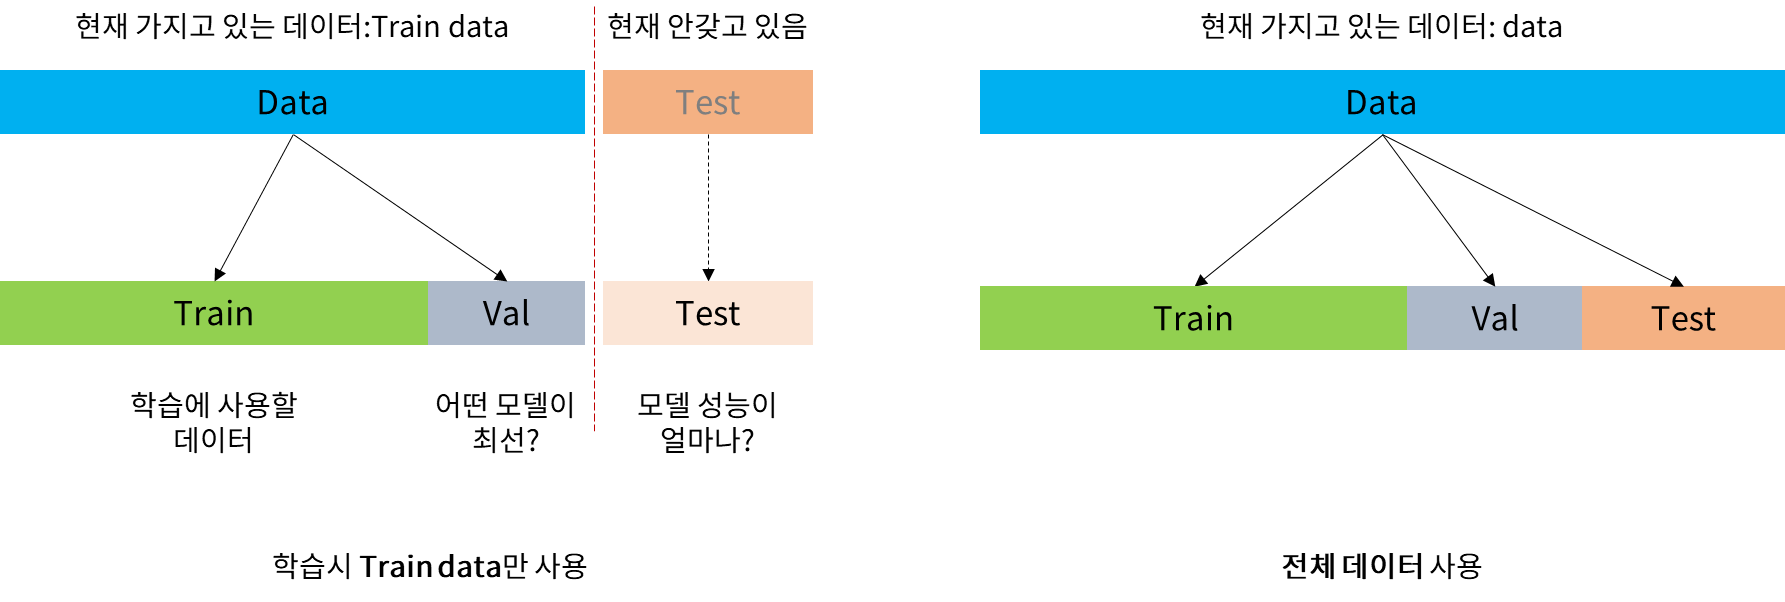

In [20]:
from sklearn.model_selection import KFold, GridSearchCV

## 데이터 준비 (X, y) 등 전체 데이터 사용 가정

## 하이퍼파라미터 그리드 정의
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

## 10번 반복
n_iterations = 10
k_outer = 5
k_inner = 5

## 결과 저장 리스트
all_outer_results = []
all_cv_results = []

In [21]:
for iteration in range(n_iterations):
    print(f"\n=== Iteration {iteration + 1} ===")

    ## 데이터를 train(train+val)과 test로 분할 (4:1), outer loop
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, ### X를 사용함에 유의
                                                                                                                        y,
                                                                                                                        test_size = 0.2,
                                                                                                                        random_state = iteration*11)

    ## train+val을 train과 val로 분할 (4:1, 전체 데이터 기준 16:4) inner loop
    X_train, X_val, y_train, y_val  =  train_test_split(X_train_val, ### X_train_val을 여기서 사용
                                                                                                     y_train_val,
                                                                                                     test_size = 0.2,
                                                                                                     random_state = iteration*12)


    ## 내부 교차 검증 설정
    inner_cv  =  KFold(n_splits  = k_inner,
                                          shuffle = True,
                                          random_state = iteration*13)

    ## 하이퍼파라미터 그리드 정의


    ## 그리드 검색 설정 (Inner-loop, 내부 교차 검증 사용)
    grid_search  =  GridSearchCV(DecisionTreeClassifier(),
                                                                param_grid, # 파라미터 그리드
                                                                cv = inner_k, # number of cv folds
                                                                scoring = 'accuracy', # scoring criteria, 'roc_auc', 'f1' 등등
                                                                refit = True, # 교차 검증 후, 최적 값을 저장
                                                                error_score = 'raise', # 애러 발생시 예외처리
                                                                verbose = True, # 내부 과정 프린트
                                                                n_jobs = -1 # 병렬 처리,
                                                   )

    ## 훈련 데이터로 그리드 검색 수행
    grid_search.fit(X_train, y_train)


    ## GridSearchCV 결과 저장
    cv_results = pd.DataFrame(grid_search.cv_results_)
    all_cv_results.append(cv_results)


    ## 최적 하이퍼파라미터로 모델 생성
    # best_model = grid_search.best_estimator_
    #  refit = True 라서 생략 가능


    ## 검증 데이터로 모델 평가
    best_model = grid_search
    y_val_pred = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)


    ## 테스트 데이터로 최종 평가
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    all_outer_results.append((val_accuracy, test_accuracy))

    print(f"Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Best Hyperparameters: {grid_search.best_params_}")



=== Iteration 1 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Accuracy: 0.9783, Test Accuracy: 0.9790
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

=== Iteration 2 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Accuracy: 0.9737, Test Accuracy: 0.9776
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 2}

=== Iteration 3 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Accuracy: 0.9741, Test Accuracy: 0.9796
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

=== Iteration 4 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Accuracy: 0.9775, Test Accuracy: 0.9786
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}

=== Iteration 5 ===
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Validation Accuracy: 0.9816, Test Ac

- 최적 하이퍼파라미터
  - iteration마다 다른 하이퍼파라미터를 사용함
  - 내가 만든 모델에 대해서 **최적의 하이퍼파라미터를 찾았다는 가정**하의, 모델 성능 평가가 됨

In [22]:
all_cv_results[0]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019051,0.001971,0.004318,0.000384,gini,3,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.953597,0.943140,0.952530,0.955138,0.945749,0.950031,0.004709,19
1,0.018013,0.002965,0.004700,0.001303,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.953597,0.943140,0.952530,0.955138,0.945749,0.950031,0.004709,19
2,0.016770,0.002849,0.004518,0.000636,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.953597,0.943140,0.952530,0.955138,0.945749,0.950031,0.004709,19
3,0.024315,0.003269,0.004501,0.000535,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.977059,0.967136,0.972353,0.980699,0.971309,0.973711,0.004709,14
4,0.023527,0.002948,0.003983,0.000195,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.977059,0.967658,0.972353,0.980699,0.971309,0.973816,0.004566,13
5,0.024989,0.003921,0.004233,0.000300,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.977059,0.967136,0.972353,0.980699,0.971309,0.973711,0.004709,14
6,0.027445,0.001326,0.004266,0.000471,gini,7,2,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.981230,0.974961,0.974439,0.985394,0.975483,0.978301,0.004311,3
7,0.027596,0.000777,0.004260,0.000627,gini,7,5,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.981752,0.974961,0.973396,0.984872,0.974439,0.977884,0.004568,6
8,0.029513,0.003085,0.003906,0.000062,gini,7,10,"{'criterion': 'gini', 'max_depth': 7, 'min_sam...",0.980709,0.975483,0.972874,0.983829,0.975483,0.977675,0.003993,8
9,0.034350,0.000322,0.003978,0.000124,gini,10,2,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.983837,0.979134,0.976004,0.985394,0.972874,0.979449,0.004686,1


In [23]:
## 최종 평균 성능 계산
mean_accuracy = np.mean(all_outer_results)
print("\n===== Final Results ======")
print("Mean Test Accuracy across all folds: ", np.round(mean_accuracy, 4))
print("Standard Deviation of Test Accuracy: ", np.round(np.std(all_outer_results), 4))



===== Final Results ======
Mean Test Accuracy across all folds:  0.978
Standard Deviation of Test Accuracy:  0.0022


In [24]:
# EOS